# Stage 4: Sentiment Analyses of Relevant Tweets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keys
from IPython.display import IFrame
from wordcloud import WordCloud,STOPWORDS
import folium
import time
import imageio

In [2]:
from termcolor import colored
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import re
import seaborn as sms
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
lemma = WordNetLemmatizer()
STOPWORDS=set(stopwords.words('english')+list(punctuation))
STOPWORDS.remove("not")

In [19]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
STOPWORDS=set(stopwords.words('english')+list(punctuation))
STOPWORDS.remove("not")

In [20]:
relevant_Tweets=pd.read_csv('relevantTweets.csv')

In [21]:
processing_data=relevant_Tweets.copy()

In [22]:
processing_data.head(2)

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date,Baseline_Terms,Prediction
0,62c025362199f17ae64a6e30,The insurance industry has an opportunity to d...,the insurance industry has an opportunity to d...,"London, UK",Sat Jul 02 11:00:00 +0000 2022,"['damage', 'risk']",1
1,62c02a9e2199f17ae64a6e3b,@MU53701477 @abipittbull @Renehaehnlein @Ljudm...,user_mention user_mention user_mention user_me...,NaN,Sat Jul 02 11:23:05 +0000 2022,['please'],1


In [23]:
processing_data.drop(['RawTweets','User_Location','Date','Baseline_Terms','Prediction'],axis = 1, inplace = True)

In [24]:
processing_data.head(1)

,TweetsID,Cleaned_Tweets
0,62c025362199f17ae64a6e30,the insurance industry has an opportunity to d...


In [36]:
pwd

'C:\\Users\\User'

In [35]:
processing_data.to_csv('reducedlabelledTweets.csv', index = False) #Saving reduced labelled Tweets to CSV File for Senti-Strength Operation

In [48]:
sentimentTweets_dataFrame.to_csv('labelledTweets.csv', index = False) #Saving␣labelled Tweets to CSV File

## Loading Labelled Data from Senti-Strength Operation

In [26]:
sentiment_data=get_tweet_sentimentscore()

In [27]:
sentiment_data[0]

{'TweetsID': '62c025362199f17ae64a6e30',
 'Cleaned_Tweets': 'the insurance industry has an opportunity to develop affirmative physical damage offerings URL user_mention cambridgecentreofriskstudies russiaukraine cyber risk geopoliticalrisk ',
 'CleanText': 'insurance industry opportunity develop affirmative physical damage offerings cambridgecentreofriskstudies russiaukraine cyber risk geopoliticalrisk',
 'Positive': 1,
 'Negative': -2,
 'Sentiment_score': 'Negative'}

In [30]:
sentimentTweets_dataFrame=pd.DataFrame(sentiment_data)

In [37]:
sentimentTweets_dataFrame.head()

,TweetsID,Cleaned_Tweets,CleanText,Positive,Negative,Sentiment_score
0,62c025362199f17ae64a6e30,the insurance industry has an opportunity to d...,insurance industry opportunity develop affirma...,1,-2,Negative
1,62c02a9e2199f17ae64a6e3b,user_mention user_mention user_mention user_me...,wellknown socialist come man silly explain ple...,2,-3,Negative
2,62c02ad82199f17ae64a6e3d,latest russiaukraine war live updates URL late...,latest russiaukraine war live updates latest l...,1,-3,Negative
3,62c0317f5dcb23acdffbcf39,the millions of ukrainians who fled russias in...,millions ukrainians fled russias invasion coun...,1,-2,Negative
4,62c0318e5dcb23acdffbcf3b,russias remote communities feel fallout from u...,russias remote communities feel fallout invasion,1,-2,Negative


In [32]:
sentimentTweets_dataFrame['Cleaned_Tweets'][0]

'the insurance industry has an opportunity to develop affirmative physical damage offerings URL user_mention cambridgecentreofriskstudies russiaukraine cyber risk geopoliticalrisk '

In [38]:
sentimentTweets_dataFrame.to_csv('labelledTweets.csv', index = False) #Saving␣labelled Tweets to CSV File

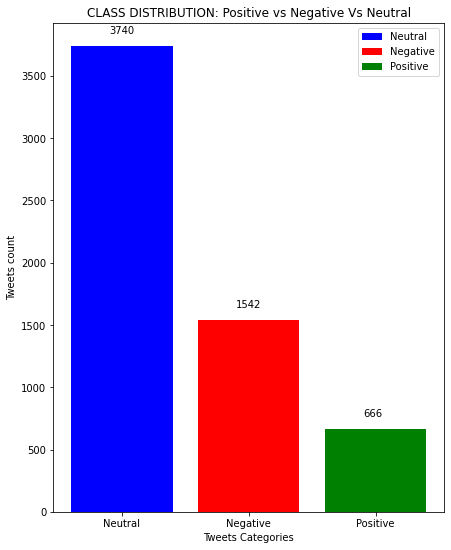

In [41]:
plot_barchat()

## Visualizations

## Classifying tweets into : Positive vs Negative vs Neutral

In [40]:
Tweet_count =sentimentTweets_dataFrame['Sentiment_score'].value_counts()
Tweet_count

Negative    3740
Neutral     1542
Positive     666
Name: Sentiment_score, dtype: int64

## Visualization of most frequently used words in the dataset

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


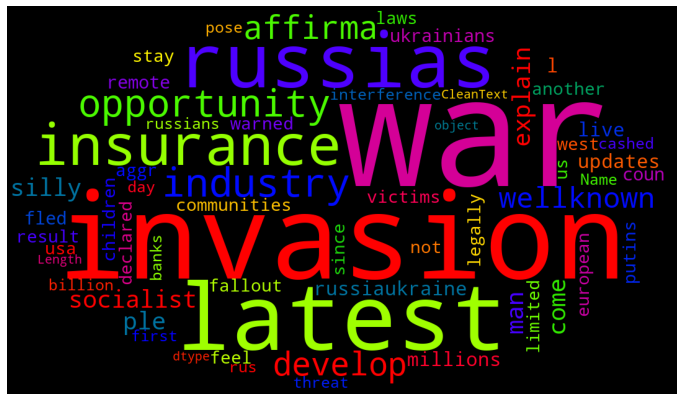

In [47]:
show_WordCloud(sentimentTweets_dataFrame)

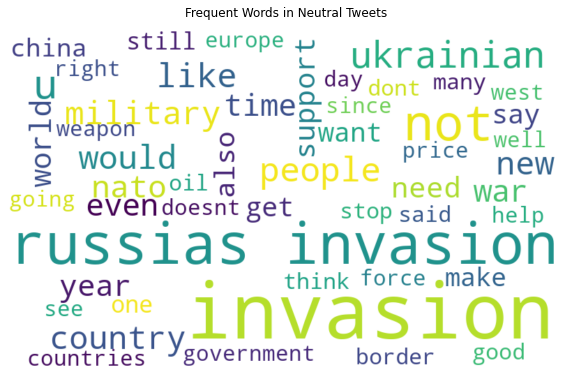

In [44]:
neutralTweets()

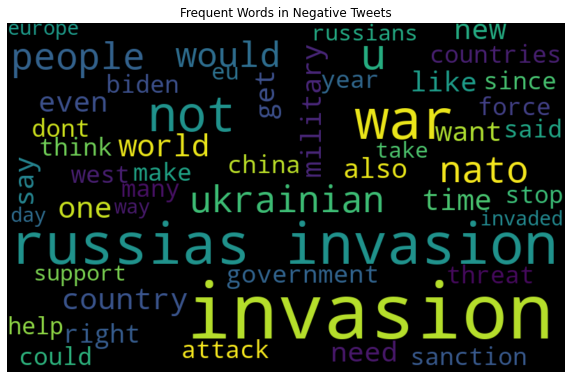

In [45]:
NegativeTweets()

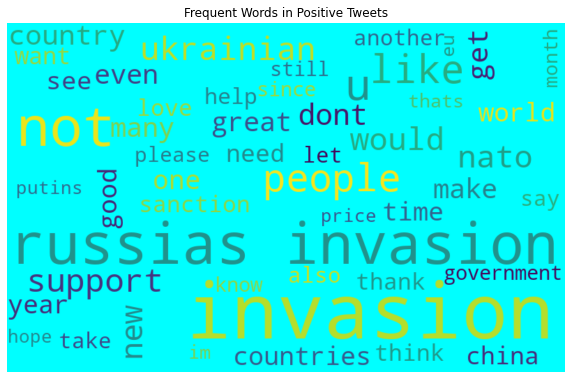

In [46]:
PositiveTweets()

# Corresponding functions used in above analysis

In [4]:
#1

In [3]:
import csv
def get_tweet_sentimentscore():
    #import csv
    from datetime import datetime
    lex1=[]

    reader = csv.reader(open('sentimentscore.csv', 'r',encoding="utf8"))
    csvreader = csv.reader(reader)
    next(reader)
    for line in reader:
        lex={}
        TweetsID,Cleaned_Tweets,Positive,Negative= line
        lex['TweetsID']=TweetsID
        lex['Cleaned_Tweets']=Cleaned_Tweets
        lex['CleanText']=lemmatize_text(lex['Cleaned_Tweets'])
        lex['Positive'] = int(Positive)
        lex['Negative'] = int(Negative)
        d=lex['Negative']+lex['Positive']
        d=int(d)
        if d > 0:
            lex['Sentiment_score'] ='Positive'
        elif d==0:
            lex['Sentiment_score'] ='Neutral'
        else:
            lex['Sentiment_score'] = 'Negative'
        lex1.append(lex)
    return lex1

In [5]:
#2

In [6]:
def show_WordCloud(tweets,title=None):
    df =tweets
    df=df.dropna()
    mask_image = imageio.imread('mask_oval.png')
    wordcloud = WordCloud(colormap='prism',mask=mask_image,background_color='black',stopwords=STOPWORDS,max_words=100)
    wordcloud = wordcloud.generate(str(df['CleanText']))
    wordcloud = wordcloud.to_file('total.png')
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [7]:
#3

In [8]:
def neutralTweets():
    neutralTweets =' '.join([text for text in sentimentTweets_dataFrame['CleanText'][sentimentTweets_dataFrame['Sentiment_score']=='Neutral']])
    wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,max_words=50,random_state = 0, max_font_size =110,background_color='white').generate(neutralTweets)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('neutral.png')
    plt.axis('off')
    plt.title('Frequent Words in Neutral Tweets')
    plt.show()

In [9]:
#4 

In [10]:
def PositiveTweets():
    positiveTweets =' '.join([text for text in sentimentTweets_dataFrame['CleanText'][sentimentTweets_dataFrame['Sentiment_score'] =='Positive']])
    wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,max_words=50, random_state = 0, max_font_size = 110,background_color='cyan').generate(str(positiveTweets))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('positive.png')
    plt.axis('off')
    plt.title('Frequent Words in Positive Tweets')
    plt.show()

In [11]:
#5

In [12]:
def NegativeTweets():
    negativeTweets =' '.join([text for text in sentimentTweets_dataFrame['CleanText'][sentimentTweets_dataFrame['Sentiment_score'] =='Negative']])
    wordcloud = WordCloud(width=800, height=500,stopwords=STOPWORDS,max_words=50, random_state = 0, max_font_size = 110,background_color='black').generate(negativeTweets)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud = wordcloud.to_file('negative.png')
    plt.axis('off')
    plt.title('Frequent Words in Negative Tweets')
    plt.show()

In [13]:
#6

In [14]:
def lemmatize_text(tweets):
    tweets = word_tokenize(tweets)
    valid_Words=[]
    for word in tweets :
        if word in STOPWORDS or word=='URL' or word=='user_mention' or word=='amp' or word=='dsnap'or word=='russia' or word=='russian'or word=='putin'or word=='ukraine' or word=='gtgt' in word or word=='…' :continue
        valid_Words.append(word)
        #tweets=[lemma.lemmatize(word) for word in valid_Words]
        tweets=' '.join(valid_Words)
    return tweets

In [15]:
#7

In [16]:
def plot_barchat():
    plt.figure(figsize = (7,9))
    plt.bar(['Neutral', 'Negative','Positive'], Tweet_count.values, color = ['b', 'r','g'])
    for i, v in enumerate(Tweet_count.values):
        plt.text(i - 0.1, v + 100, str(v))
    plt.xlabel("Tweets Categories")
    plt.ylabel("Tweets count")
    plt.title("CLASS DISTRIBUTION: Positive vs Negative Vs Neutral")
    plt.savefig('compare_sentiment.png')
    plt.savefig('compare_class.png')
    colors = {'Neutral':'blue', 'Negative':'red','Positive':'green'}
    labels = list(colors.keys())
    handles = plt.bar(['Neutral', 'Negative','Positive'], Tweet_count.values, color = ['b', 'r','g'])
    plt.legend(handles,labels)


In [17]:
from IPython.display import HTML
HTML('''<script>
var code_show_err = false;
var code_toggle_err = function() {
    var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
var stderr = Array.from(stderrNodes)
if (code_show_err){
stderr.forEach(ele => ele.style.display = 'block');
11
} else {
stderr.forEach(ele => ele.style.display = 'none');
}
code_show_err = !code_show_err
}
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')
